# Air Quality Prediction

A neural network model for predicting air quality based on given parameters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
from sklearn.model_selection import train_test_split

2024-04-12 16:30:24.765082: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 16:30:25.960219: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 1. Load data

In [2]:
data = pd.read_csv('data/AirQualityUCI.csv', delimiter=';', decimal=',')

In [3]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [4]:
data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(9471, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


## 2. Dataset cleanup

In [7]:
data.isna().any()

Date             True
Time             True
CO(GT)           True
PT08.S1(CO)      True
NMHC(GT)         True
C6H6(GT)         True
PT08.S2(NMHC)    True
NOx(GT)          True
PT08.S3(NOx)     True
NO2(GT)          True
PT08.S4(NO2)     True
PT08.S5(O3)      True
T                True
RH               True
AH               True
Unnamed: 15      True
Unnamed: 16      True
dtype: bool

In [8]:
data.isna().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [9]:
data = data.drop(["Unnamed: 15", "Unnamed: 16"], axis=1)

In [10]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [11]:
data.shape

(9471, 15)

In [12]:
data.isnull().any()

Date             True
Time             True
CO(GT)           True
PT08.S1(CO)      True
NMHC(GT)         True
C6H6(GT)         True
PT08.S2(NMHC)    True
NOx(GT)          True
PT08.S3(NOx)     True
NO2(GT)          True
PT08.S4(NO2)     True
PT08.S5(O3)      True
T                True
RH               True
AH               True
dtype: bool

In [13]:
data.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [14]:
data.dropna(inplace=True)

In [15]:
data.shape

(9357, 15)

In [16]:
data.isna().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)         False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [17]:
data.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [18]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [19]:
data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [20]:
data = data.replace(-200.0, np.NaN)

In [21]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [22]:
data.isna().any()

Date             False
Time             False
CO(GT)            True
PT08.S1(CO)       True
NMHC(GT)          True
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)           True
PT08.S3(NOx)      True
NO2(GT)           True
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
dtype: bool

In [23]:
data.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [24]:
data.dropna(subset=["NOx(GT)"], inplace=True)

In [25]:
data.dropna(subset=["CO(GT)"], inplace=True)

In [26]:
data.dropna(subset=["T"], inplace=True)

In [27]:
data.isna().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)          True
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)           True
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [28]:
data.shape

(6944, 15)

In [29]:
data.index = range(len(data))

In [30]:
data["Time"] = data["Time"].str.split('.').str[0]

In [31]:
train_data = data[["CO(GT)", "NOx(GT)", "Time", "T"]]

In [32]:
train_data

,CO(GT),NOx(GT),Time,T
0,2.6,166.0,18,13.6
1,2.0,103.0,19,13.3
2,2.2,131.0,20,11.9
3,2.2,172.0,21,11.0
4,1.6,131.0,22,11.2
...,...,...,...,...
6939,3.1,472.0,10,21.9
6940,2.4,353.0,11,24.3
6941,2.4,293.0,12,26.9
6942,2.1,235.0,13,28.3


In [33]:
train_data.to_csv('data/cleaned_data.csv', index=False)
train_data.to_csv('data/cleaned_data.data', index=False, header=False)

In [34]:
df_1 = train_data[["Time", "T", "CO(GT)"]]
df_2 = train_data[["Time", "T", "NOx(GT)"]]

In [35]:
df_1.head()

,Time,T,CO(GT)
0,18,13.6,2.6
1,19,13.3,2.0
2,20,11.9,2.2
3,21,11.0,2.2
4,22,11.2,1.6


In [36]:
df_2.head()

,Time,T,NOx(GT)
0,18,13.6,166.0
1,19,13.3,103.0
2,20,11.9,131.0
3,21,11.0,172.0
4,22,11.2,131.0


In [42]:
X_df_1 = df_1.drop('CO(GT)', axis=1)
y_df_1 = df_1['CO(GT)']

In [38]:
X_df_1.shape, y_df_1.shape, X_df_1.shape[1]

((6944, 2), (6944,), 2)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_df_1, y_df_1, test_size=0.15)

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1775)

In [48]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((4854, 2), (1048, 2), (1042, 2), (4854,), (1048,), (1042,))

In [49]:
model = keras.Sequential()


# The Input Layer :
model.add(keras.layers.Dense(X_train.shape[1], kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# Hidden layers
model.add(keras.layers.Dense(256, kernel_initializer='normal', activation='relu'))
model.add(keras.layers.Dense(256, kernel_initializer='normal', activation='relu'))
model.add(keras.layers.Dense(256, kernel_initializer='normal', activation='relu'))

# Output layer
model.add(keras.layers.Dense(1, kernel_initializer='normal', activation='linear'))

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model.summary()

/home/kostas/Documents/Programs/Python/Venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-12 16:35:10.969396: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-12 16:35:10.970216: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to down

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,615 (518.03 KB)

 Trainable params: 132,615 (518.03 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# Plot a graph of a fitted model
def graph(history):
    plt.plot(history.history['r2_score'])
    plt.plot(history.history['val_r2_score'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [ ]:
# Fitting the model

history = model.fit(X_train, y_train, epochs=1000, batch_size=60, validation_data=(X_val, y_val))

Epoch 1/1000
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8238 - mean_squared_error: 1.3411 - r2_score: 0.3310 - val_loss: 0.8719 - val_mean_squared_error: 1.5613 - val_r2_score: 0.2895
Epoch 2/1000
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8124 - mean_squared_error: 1.3440 - r2_score: 0.3588 - val_loss: 0.8759 - val_mean_squared_error: 1.5908 - val_r2_score: 0.2760
Epoch 3/1000
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8033 - mean_squared_error: 1.3059 - r2_score: 0.3396 - val_loss: 0.8732 - val_mean_squared_error: 1.5707 - val_r2_score: 0.2852
Epoch 4/1000
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8078 - mean_squared_error: 1.3514 - r2_score: 0.3356 - val_loss: 0.8685 - val_mean_squared_error: 1.5514 - val_r2_score: 0.2940
Epoch 5/1000
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8013 - mean_squared_error: 1.2848 - r2_score: 0.3424 - val_loss: 0.8738 - val_mean_squared_error: 1.5405 - val_r2_score: 0.2989
Epoch 6/1000
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [56]:
loss, mse, r2 = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, MSE: {mse}, R^2: {r2}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8743 - mean_squared_error: 1.3805 - r2_score: 0.2610 
Loss: 0.861026406288147, MSE: 1.4079179763793945, R^2: 0.2638998031616211


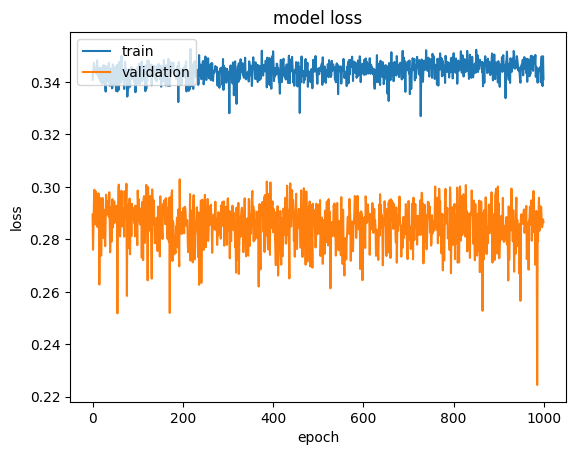

In [66]:
graph(history)